In [1]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import os

from env import host, user, password

In [2]:
#1. Acquire customer_id, monthly_charges, tenure, and total_charges from telco_churn database for all 
# customers with a 2 year contract.

def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

def new_telco_data():
    '''
    This function reads the telco_churn data from the Codeup db into a df,
    write it to a csv file, and returns the df.
    '''
    # Create SQL query.
    sql_query = ''' select customer_id, monthly_charges, tenure, total_charges
                    from customers
                    where contract_type_id = 3;
                    '''
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('telco_churn'))
    
    return df

def get_telco_data(cached=False):
    '''
    This function reads in telco_churn data from Codeup database and writes data to
    a csv file if cached == False or if cached == True reads in telco df from
    a csv file, returns df.
    '''
    if cached == False or os.path.isfile('telco_df.csv') == False:
        
        # Read fresh data from db into a DataFrame.
        df = new_telco_data()
        
        # Write DataFrame to a csv file.
        df.to_csv('telco_df.csv')
        
    else:
        
        # If csv file exists or cached == True, read in data from csv.
        df = pd.read_csv('telco_df.csv', index_col=0)
        
    return df

In [3]:
telco = get_telco_data()
telco.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.8
2,0016-QLJIS,90.45,65,5957.9
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [4]:
#2. Walk through the steps above using your new dataframe. You may handle the missing values
# however you feel is appropriate.
telco.shape

(1695, 4)

In [5]:
telco.describe()

,monthly_charges,tenure
count,1695.000000,1695.000000
mean,60.770413,56.735103
std,34.678865,18.209363
min,18.400000,0.000000
25%,24.025000,48.000000
50%,64.350000,64.000000
75%,90.450000,71.000000
max,118.750000,72.000000


In [6]:
telco.info()
#total charges is object, deal with it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   monthly_charges  1695 non-null   float64
 2   tenure           1695 non-null   int64  
 3   total_charges    1695 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 53.1+ KB


In [7]:
telco.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [8]:
print(telco.isnull().sum())

customer_id         0
monthly_charges     0
tenure              0
total_charges      10
dtype: int64


In [9]:
print(telco.columns[telco.isnull().any()])

Index(['total_charges'], dtype='object')


In [10]:
telco.total_charges.value_counts(sort=True, ascending=True)

6841.4     1
2288.7     1
5468.45    1
1790.8     1
161.65     1
          ..
7334.05    2
3533.6     2
844.45     2
1161.75    2
343.45     2
Name: total_charges, Length: 1677, dtype: int64

In [11]:
telco = telco.dropna()
telco.shape

(1685, 4)

In [12]:
telco['total_charges'] = telco.total_charges.astype(float)
telco.dtypes

customer_id         object
monthly_charges    float64
tenure               int64
total_charges      float64
dtype: object

In [13]:
telco.describe()

,monthly_charges,tenure,total_charges
count,1685.000000,1685.00000,1685.000000
mean,60.872374,57.07181,3728.933947
std,34.712210,17.72913,2571.252806
min,18.400000,1.00000,20.350000
25%,24.050000,48.00000,1278.800000
50%,64.450000,64.00000,3623.950000
75%,90.550000,71.00000,5999.850000
max,118.750000,72.00000,8672.450000


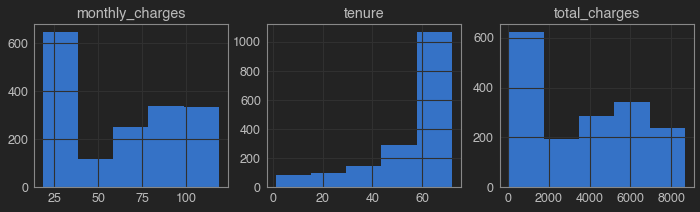

In [14]:
from jupyterthemes import jtplot
jtplot.style()

plt.figure(figsize=(16, 3))

for i, col in enumerate(list(telco.columns[1:])):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = telco[col]  
    plt.subplot(1,4, plot_number)
    plt.title(col)
    series.hist(bins=5)

In [15]:
telco.columns[1:]

Index(['monthly_charges', 'tenure', 'total_charges'], dtype='object')

<AxesSubplot:>

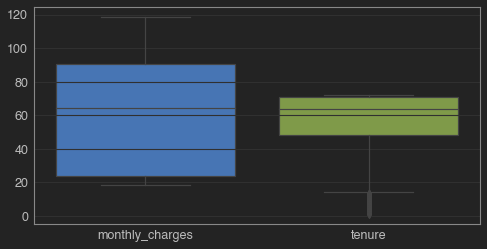

In [16]:
plt.figure(figsize=(8,4))
sns.boxplot(data=telco.drop(columns=['customer_id', 'total_charges']))

<AxesSubplot:>

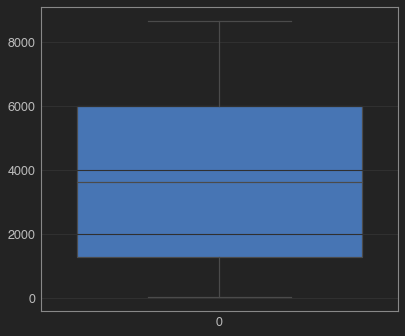

In [17]:
sns.boxplot(data=telco.total_charges)

In [18]:
def acquire_telco(cached=False):
    '''
    This function reads in telco_churn data from Codeup database and writes data to
    a csv file if cached == False or if cached == True reads in telco df from
    a csv file, returns df.
    '''
    if cached == False or os.path.isfile('telco_df.csv') == False:
        
        # Read fresh data from db into a DataFrame.
        df = new_telco_data()
        
        # Write DataFrame to a csv file.
        df.to_csv('telco_df.csv')
        
    else:
        
        # If csv file exists or cached == True, read in data from csv.
        df = pd.read_csv('telco_df.csv', index_col=1)
        df = df.drop(columns='Unnamed: 0')
       
    return df

In [19]:
def clean_telco(df):
    '''Takes in a df of telco data and cleans the data by replacing blanks and dropping null values. 
    The total_charges column is then converted to float
    
    return: df, a cleaned pandas dataframe'''
    df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
    df = df.dropna()
    df['total_charges'] = df.total_charges.astype(float)
    return df

In [20]:
def split_telco(df, stratify_by=None):
    """
    Crude train, validate, test split
    To stratify, send in a column name
    """
    
    if stratify_by == None:
        train, test = train_test_split(df, test_size=.2, random_state=123)
        train, validate = train_test_split(df, test_size=.3, random_state=123)
    else:
        train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[stratify_by])
        train, validate = train_test_split(train_validate, test_size=.3, random_state=123, stratify=train_validate[stratify_by])
    
    return train, validate, test

In [21]:
def wrangle_telco(split=False):
    '''
    wrangle_telco will read in our student grades as a pandas dataframe,
    clean the data
    split the data
    return: train, validate, test sets of pandas dataframes from telco, stratified on total_charges
    '''
    df = clean_telco(acquire_telco(cached=True))
    if split == True:
        return split_telco(df)
    else:
        return df

    

In [24]:
train, validate, test = wrangle_telco(split = True)
train.head()

,monthly_charges,tenure,total_charges
customer_id,,,
3396-DKDEL,115.15,70,8250.00
8966-KZXXA,25.10,36,930.95
8857-CUPFQ,19.25,63,1237.65
6901-GOGZG,84.95,60,4984.85
8606-OEGQZ,25.30,18,454.65


In [27]:
df = wrangle_telco(split=False)
df.shape

(1685, 3)

In [28]:
telco.total_charges.nunique()

1677

In [31]:
telco.describe()


,monthly_charges,tenure,total_charges
count,1685.000000,1685.00000,1685.000000
mean,60.872374,57.07181,3728.933947
std,34.712210,17.72913,2571.252806
min,18.400000,1.00000,20.350000
25%,24.050000,48.00000,1278.800000
50%,64.450000,64.00000,3623.950000
75%,90.550000,71.00000,5999.850000
max,118.750000,72.00000,8672.450000


In [34]:
np.quantile(telco.total_charges, q=0.25)

1278.8